# Arsenal Social Sentiment Analysis
## Forecasting User Sentiment between games. 
by *Ben N. Bellman* 
<br> Prepared as Springboard Capstone Project
<br> *4/13/2022*

<img src="../images/who-s-denilo-SuBb_SiEEM8-unsplash.jpg" style="width:800px;height:400px"/>

### WARNING: 
*Although the usernames have been anonymized as to protect the privacy of the users in this analysis, the tweets are still in raw format and may contain inappropriate / sensitive content. Viewer discretion is advised*

## Outline

## Data Mapping: 

One of the important things to know for the analysis is the schedule of the games.
The objective in the social sentiment analysis is to predict whether or not a specific tweet is likely to come  

In [1]:
%load_ext watermark
%watermark 

Last updated: 2022-04-30T15:38:09.225933-07:00

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.0.1

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [2]:
## We start by importing the packages we will use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb 

from sklearn.metrics import precision_recall_curve, roc_curve, auc, confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import mean_squared_error as mse, r2_score, mean_absolute_error as mae, f1_score, fbeta_score 
from sklearn.metrics import plot_confusion_matrix,classification_report, balanced_accuracy_score, recall_score
from sklearn.metrics import roc_auc_score, log_loss,matthews_corrcoef, ConfusionMatrixDisplay

from io import StringIO 
from IPython.display import Image,HTML 
import pydotplus
import graphviz
import shap

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth',-1)
%matplotlib inline

In [3]:
pwd

'C:\\Users\\benja\\1.SpringBoard\\Github_Repos\\Arsenal_Sentiment_Analysis\\Notebooks'

In [4]:
## Import Functions from pandas module.
import sys
sys.path.insert(1, './../../Analysis_Functions_For_Pandas')
from functions import (preview_data,
                       get_missing_counts,
                       get_value_counts,
                       get_unique_column_count,
                       get_datetimes)   

In [5]:
## Load the Data
df = pd.read_csv('.\..\Data\Finalized_DataFrame.csv')

## I. Data Exploration and Data Wrangling

In [6]:
## Start by previewing the data:
preview_data(df)

First Five Rows of Data: 



Unnamed: 0                     Query                       Date  \
0  0           Arsenal until:2022-04-23  2022-04-22 23:59:56+00:00   
1  1           Arsenal until:2022-04-23  2022-04-22 23:59:54+00:00   
2  2           Arsenal until:2022-04-23  2022-04-22 23:59:54+00:00   
3  3           Arsenal until:2022-04-23  2022-04-22 23:59:53+00:00   
4  4           Arsenal until:2022-04-23  2022-04-22 23:59:51+00:00   

             User  \
0  RoweThings       
1  Ancurancuran01   
2  celsky07         
3  fachry4          
4  GunnersDXB       

                                                                                                                                                                                                                                                                                     Tweet  \
0  Can’t seem to find any serious buyers tonight for the game, so going to give one away (well not exactly) Xbox one new edition players get the chance to play me Arsenal Vs United on fifa and if you win the ticket is yours. No money. No scam involved #ARSMUN @arsenaltickets9 #scam   
1  Gabsus solusi masalah striker Arsenal kah?? https://t.co/x7KYqk0pYJ                                                                                                                                                                                                                       
2  @el3estuvodemas @m_delprado_7 @agus____1974 @jachaci3 @DiarioOle Agregar que Arsenal venía fuerte con el Papu Gómez...se habían chingado en semifinales a River Plate. De cualquier forma, vencer a Grondona estaba difícil.                                                              
3  Payah nih yang ngancem bom. Jadi ga maen dah dia pas lawan Arsenal https://t.co/gxvokwP5ye                                                                                                                                                                                                
4  If this happens the arsenal are acc back. https://t.co/SLMr1EZtnb                                                                                                                                                                                                                         

   TweetLikes  TweetReplies  RetweetCount  Result     Team  
0  0           3             0             1       Arsenal  
1  0           0             0             1       Arsenal  
2  1           1             0             1       Arsenal  
3  0           0             0             1       Arsenal  
4  1           0             0             1       Arsenal


 Shape: 

(37000, 10)

 Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37000 entries, 0 to 36999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    37000 non-null  int64 
 1   Query         37000 non-null  object
 2   Date          37000 non-null  object
 3   User          37000 non-null  object
 4   Tweet         37000 non-null  object
 5   TweetLikes    37000 non-null  int64 
 6   TweetReplies  37000 non-null  int64 
 7   RetweetCount  37000 non-null  int64 
 8   Result        37000 non-null  int64 
 9   Team          37000 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.8+ MB
None


In [7]:
## Get the missing values
get_missing_counts(df)

Missing Value Percentages by Column: 

Unnamed: 0 -----> 0 -----> 0.0%
Query -----> 0 -----> 0.0%
Date -----> 0 -----> 0.0%
User -----> 0 -----> 0.0%
Tweet -----> 0 -----> 0.0%
TweetLikes -----> 0 -----> 0.0%
TweetReplies -----> 0 -----> 0.0%
RetweetCount -----> 0 -----> 0.0%
Result -----> 0 -----> 0.0%
Team -----> 0 -----> 0.0%


In [8]:
## Converts date to datetime. 

# Fix this --> get_datetimes(df,'Date',['Date'])
df['Date'] = df['Date'].apply(pd.to_datetime)
print('Date Ranges: {} -- {}'.format(df['Date'].min(), df['Date'].max()))

Date Ranges: 2017-08-10 23:51:16+00:00 -- 2022-04-22 23:59:56+00:00


Ok, so the date ranges are between 03-29-22 and 4-13-22, so the 500,000 tweets about Arsenal are all in a two week period. 
<br> In that two week period, Arsenal were coming out of the international break and played two games which they both lost: 
- **Crystal Palace** -- *04-04-22*  
- **Brighton & Holvion** -- *04-09-22* 

In [9]:
## Get unique values in each column: 
get_unique_column_count(df)

Unique values in each object column: 

Query: 370
User: 27702
Tweet: 36509
Team: 2


Looking at this, we have a little more than twice as many tweets as users. 

In [10]:
## Get Values
get_value_counts(df)

Unique values in each object column: 

Query
Arsenal until:2022-04-23      100
Arsenal until:2019-02-09      100
Arsenal until:2019-01-01      100
Arsenal until:2019-01-12      100
Tottenham until:2019-01-13    100
                             ... 
Tottenham until:2020-12-06    100
Arsenal until:2020-12-06      100
Tottenham until:2020-12-13    100
Arsenal until:2020-12-13      100
Arsenal until:2017-08-11      100
Name: Query, Length: 370, dtype: int64{}


User
SpursNewsApp     115
spursnewsonly    105
TottenhamNews    78 
Arsenal_Fanly    73 
weatherN15       71 
                 .. 
Abike90458044    1  
iDLIBYH91        1  
marco__flores    1  
DonWizi          1  
ChrisStaplee     1  
Name: User, Length: 27702, dtype: int64{}


Tweet
Klub Lokal Indonesia, Niac Mitra Mengalahkan   Arsenal 2-0 pada 16 Juni 1983 di Surabaya.                                                                                        70
Tottenham have collected just 3 points from a possible 21 against teams 

In [11]:
## We can look at the distribution of our tweets.
df.describe()

Unnamed: 0    TweetLikes  TweetReplies  RetweetCount        Result
count  37000.000000  37000.000000  37000.000000  37000.00000   37000.000000
mean   18499.500000  7.547108      0.579351      0.81273       0.510811    
std    10681.124317  154.920691    5.861342      14.72650      0.499890    
min    0.000000      0.000000      0.000000      0.00000       0.000000    
25%    9249.750000   0.000000      0.000000      0.00000       0.000000    
50%    18499.500000  0.000000      0.000000      0.00000       1.000000    
75%    27749.250000  1.000000      1.000000      0.00000       1.000000    
max    36999.000000  15241.000000  552.000000    1606.00000    1.000000

## II. Exploratory Data Analysis

We can look at the distribution of tweets.

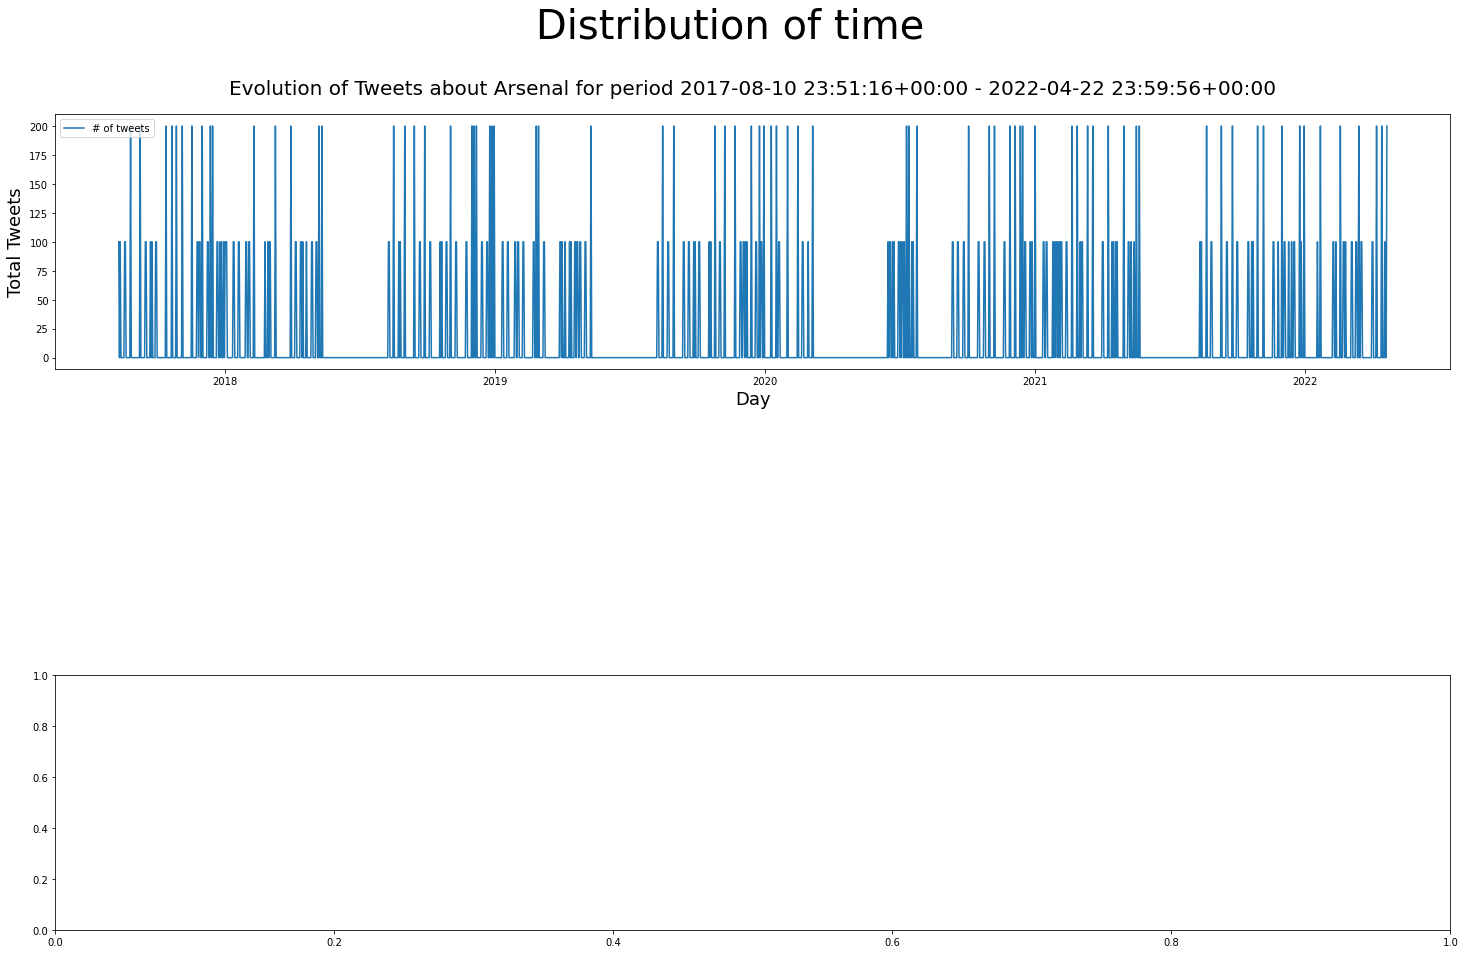

<Figure size 1440x576 with 0 Axes>

In [12]:
## We create a time-series Dataframe and resample by day.
time_df = df[['Date','User']]
time_df['Date'] = pd.to_datetime(time_df['Date'])
time_df['Tweet'] = 1
time_df.drop(columns='User', inplace=True)
time_df.set_index('Date', inplace = True)
time_df = time_df.resample('d').sum()
time_df

## We plot the number of tweets during the time period.
fig, axes = plt.subplots(2, figsize=(25,15))
fig.suptitle('Distribution of time', fontsize =40)
fig.subplots_adjust(hspace=1.2)
plt.figure(figsize=(20,8))

axes[0].plot(time_df, label = '# of tweets')
axes[0].set_title('Evolution of Tweets about Arsenal for period {} - {}'.format(df['Date'].min(), df['Date'].max()), fontsize = 20, pad =20)
axes[0].set_xlabel('Day', fontsize = 18)
axes[0].set_ylabel('Total Tweets', fontsize = 18)
axes[0].legend(loc='best')
plt.show()

Let's look at a preview of the 10 most liked tweets. 

In [13]:
## Let's look at the 10 most popular tweets in the dataset.
df[['Tweet','Date','TweetLikes','User']].sort_values('TweetLikes', ascending =False).head(10)

Tweet  \
18343  Just about time for one more post today...\n\nSo we've made sure it's a good one 😉\n\n👔 @m8arteta https://t.co/rFhuUP3lGv                                                                                                                                                                                     
14983  Today's the day...\n\nFingers crossed for more positive memories from a Tottenham away day 🤞😉\n\n❤️ @m8arteta\n\n#TOTARS https://t.co/pBrQ2ty9Y0                                                                                                                                                              
1793   Antonio Conte: “I would like to take satisfaction with this club, but you know that football changes quickly, but I think in this moment I am totally committed to Tottenham”, he told @AlasdairGold. ⚪️ #THFC\n\n“I have a good relationship with the club, especially with Levy”. https://t.co/1Ci5FVzlfX   
4674   ⚽️⚽️⚽️⚽️🎯 Arsenal’s @Auba has been involved in five goals in his last six #PL appearances\n\n#LEIARS | @Arsenal https://t.co/ihgSmlqbe2                                                                                                                                                                       
578    Hermosa noche del Producto.\n\nGodoy Cruz lo ganaba 3-0 y con un hombre más. A los 68' le echaron a uno. A los 70' Arsenal puso el 1-3. A los 73' el 2-3. A los 86' el 3-3.\n\n¿El gol del empate? DE CHILENA. 😍🇦🇷\nhttps://t.co/eKK81wxHGM                                                                   
16235  In our last meeting with Burnley...\n\n...Sonny did THIS! 🤯\n\n#THFC ⚪️ #COYS https://t.co/e1oyj6rFZh                                                                                                                                                                                                         
28487  🇺🇾 @LTorreira34 https://t.co/8kvIfSXRUa                                                                                                                                                                                                                                                                       
24752  Graftin' hard 👊\n\n💪 @HenrikhMkh https://t.co/4RmVi2jSog                                                                                                                                                                                                                                                      
16416  💬 "We feel, as a staff, that the players are willing and are behind us and that they want to follow us."\n\n👔 @m8arteta looks ahead to #ARSEVE and reflects on his time in charge so far...                                                                                                                   
18103  Jose Mourinho is unbeaten in the #PL on Boxing Day (7 matches)\n\nHe's managed more games without defeat on the day than any other manager in the #PL\n\n@SpursOfficial | #TOTBHA https://t.co/mP3oMRP4x7                                                                                                     

                           Date  TweetLikes            User  
18343 2019-12-20 23:59:00+00:00  15241       Arsenal         
14983 2020-07-11 23:31:58+00:00  13555       Arsenal         
1793  2022-02-25 23:30:39+00:00  9125        FabrizioRomano  
4674  2021-10-29 23:48:04+00:00  8116        premierleague   
578   2022-04-08 23:56:43+00:00  5687        sudanalytics_   
16235 2020-03-06 23:55:00+00:00  5543        SpursOfficial   
28487 2018-09-14 23:41:28+00:00  5305        Arsenal         
24752 2019-01-28 23:54:19+00:00  4248        Arsenal         
16416 2020-02-22 23:58:15+00:00  4163        Arsenal         
18103 2019-12-25 23:59:04+00:00  4076        premierleague

## III. Preprocessing and Modeling

## IV. Conclusions